한국어 Word2Vec 만들기 (네이버 영화 리뷰)  
https://wikidocs.net/50739

In [1]:
!pip3 install gensim==3.8.3

     |████████████████████████████████| 24.2 MB 99 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
!pip3 install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 448 kB 69.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fb1f0de4fd0>)

In [5]:
train_data = pd.read_table('ratings.txt')

In [6]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [7]:
print(len(train_data))

200000


In [8]:
print(train_data.isnull().values.any())

True


In [9]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any())

False


In [10]:
print(len(train_data))

199992


In [11]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [12]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [13]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [14]:
# 형태소 분석기 OKT를 사용한 토큰화 작업
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


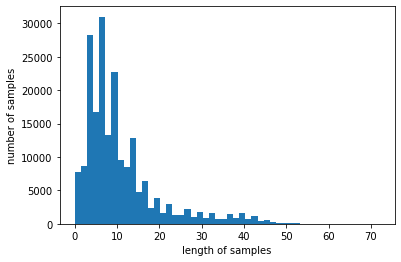

In [15]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [16]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
# size : projection layer의 m 값(행)
# window : 주변 단어 개수
# sg=0 : CBoW, sg=1 : Skip-Gram

In [17]:
model.wv.vectors.shape

(16477, 100)

In [18]:
print(model.wv.most_similar("최민식"))

[('최민수', 0.8934972882270813), ('유다인', 0.8648314476013184), ('안성기', 0.8611158728599548), ('이민호', 0.8487974405288696), ('정재영', 0.848754346370697), ('잭슨', 0.8446469902992249), ('송강호', 0.8444607853889465), ('이정재', 0.8434523344039917), ('안소니', 0.8432318568229675), ('크리스찬', 0.842919647693634)]


In [19]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8737829923629761), ('호러', 0.8564205765724182), ('무협', 0.840204119682312), ('느와르', 0.8388949036598206), ('무비', 0.8269671201705933), ('물의', 0.8267641067504883), ('블록버스터', 0.8232207894325256), ('물', 0.8133948445320129), ('로코', 0.8019363880157471), ('헐리우드', 0.8014612793922424)]


In [20]:
print(model.wv.most_similar("대한민국"))  # CBoW : 주변 단어로 중심 단어 예측

[('국민', 0.7815381288528442), ('인류', 0.7412354946136475), ('민주주의', 0.7234877347946167), ('우리나라', 0.7215731143951416), ('국가', 0.7213255763053894), ('인권', 0.7182931900024414), ('지구', 0.7180743217468262), ('다문화', 0.7123504877090454), ('성공하다', 0.707345724105835), ('세계', 0.7070705890655518)]


In [21]:
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 1)
print(model.wv.most_similar("대한민국"))  # Skip-Gram : 중심 단어로 주변 단어 예측

[('한국', 0.7184457778930664), ('현주소', 0.6937094926834106), ('남한', 0.6930913925170898), ('우리나라', 0.6877892017364502), ('망신', 0.6806065440177917), ('영화계', 0.6768848299980164), ('기원', 0.6753209829330444), ('동포', 0.6738038659095764), ('이나라', 0.6735892295837402), ('대만', 0.6711052656173706)]


In [22]:
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
print(model.wv.most_similar(['어벤저스','아이언맨']))  # 여러개 주변 단어로 중심 단어 예측

[('관상', 0.8727743029594421), ('음양사', 0.8664842844009399), ('토이스토리', 0.8661998510360718), ('버젼', 0.8657124042510986), ('스트리트', 0.862830400466919), ('버디', 0.8624024987220764), ('후편', 0.8594793081283569), ('스카이', 0.8579614162445068), ('놈놈놈', 0.854200005531311), ('후레쉬맨', 0.8523301482200623)]
